In [1]:
# https://stackoverflow.com/a/34058270
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))


════════════════╣./bifold_vs_dfpot/analytical_vs_numeric/alpha_alpha_gaussian/alpha_alpha.py╠════════════════

--------------------------------------------------------------------------------
from bifold import *
#from bifold.filon import *

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.02)  # fm^-1
R = r.copy()

z_proj, a_proj = 2, 4
z_targ, a_targ = 2, 4

rho_p = f_2prm_gaussian(r, 0.4229, (1/0.7024)**.5)
rho_t = rho_p.copy()
vnn = f_2prm_gaussian(r, -33.5606, (1/0.5889)**.5)

# analytical empirical function obtanied by Buck et al.
u1 = f_2prm_gaussian(R, -122.6225, (1/0.22)**.5)

# DFPOT calculation
u2 = f_external(R, r'a_a_dfpot_FORT4.txt', data_format=2)

# BiFold calculation
u3 = u_bifold_d(rho_p, rho_t, vnn, r, q)
print_all(u3, r, q)

# compare u1, u2 and u3.
import matplotlib.pyplot as plt
markevery = int(len(R)*5/100)

plt.grid(color='lightgray')
plt.plot(R, -u1.value, label='Buck et al.', linestyle='dotted',
         marker='o', markevery=10, color='black', alpha=0.5, 

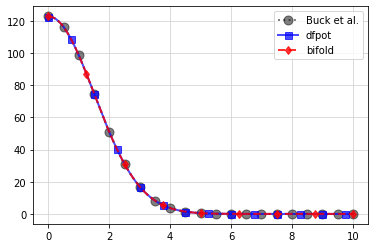


═════════════════════╣./bifold_vs_dfpot/analytical_vs_numeric/yukawa/yukawa_function.py╠═════════════════════

--------------------------------------------------------------------------------
from bifold import *

def u_analytically_folded(r, rho0, a, v0, c):
    u_numerator = 4*pi*(48*a**5*exp(a*r)*pi + exp(c*r)*pi*(-48*a**5 -
                        3*(a - c)*(a + c)*(11*a**4 - 4*a**2*c**2 + c**4)*r -
                        3*a*(a**2 - c**2)**2*(3*a**2 - c**2)*r**2 -
                        a**2*(a**2 - c**2)**3*r**3))*v0*rho0**2

    u_denominator = 3*a**3*c*(a**2 - c**2)**4*exp((a + c)*r)*r
    u = u_numerator/u_denominator
    u[0] = f_0(r, u)
    return u

rho0, a = 2.58255, 4.0188
v1, b1, v2, b2 = +7999.00, 4.0, -2134.25, 2.5

r = mesh(zero,  5, 0.02)  # fm
q1 = mesh(zero,10, 0.02)  # fm^-1
q2 = mesh(zero, 3, 0.02)  # fm^-1

rho_p = f_exp_decay(r, rho0, a)
rho_t = rho_p.copy()
vnn = v_m3y_reid_d(r)
u_bf1 = u_bifold_d(rho_p, rho_t, vnn, r, q1)
u_bf2 = u_bifold_d(rho_p, rho_t, v

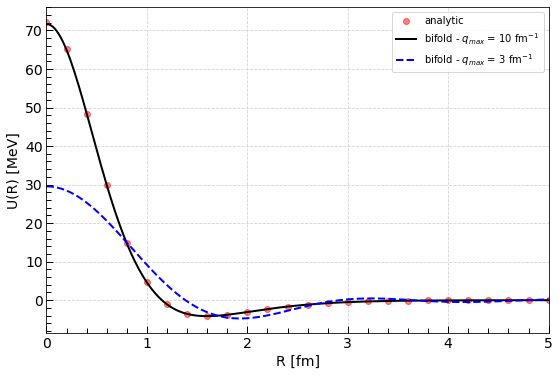


═════════════════════════╣./bifold_vs_dfpot/a_40Ca_m3y_reid_paris/a_40Ca_141_7MeV.py╠═════════════════════════

--------------------------------------------------------------------------------
# os independent paths
from os import path

# to use simpson integration by default
from bifold import *

# to use simpson integration
# from bifold.simpson import *

# to use filon integration
# from bifold.filon import *

# meshes for integrations.
# r is for the densities of nuclei.
# q is for all momentum space representations of fourier transforms.
# R defines separation radius between two nuclei.
# s defines separation between two nucleons.
# usually better to use r for R and s if unless not necessary otherwise.
r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.02)  # fm^-1
# this is to use same mesh [r] for R and s.
R = r.copy()
s = r.copy()

# e_lab is nuclear bombarding energy in the laboratory reference frame.
# z_ and a_ defines atomic number and atomic mass number, respectively.
e_

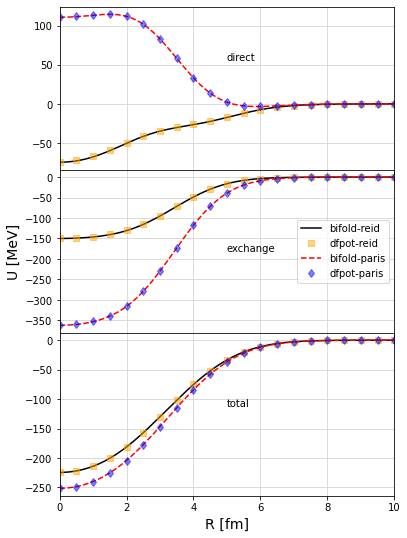


═════════════════════════════════╣./Coulomb_vs_Coulomb/coulomb_vs_coulomb.py╠═════════════════════════════════

--------------------------------------------------------------------------------
#from bifold import *
#from bifold.simpson import *
from bifold.filon import *

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.02)  # fm^-1
R = r.copy()
s = r.copy()

# Phys. Rev. C 56 (1997) 954.
# Dao T. Khoa, G. R. Satchler, and W. von Oertzen
# Fig 5. in page 961.

z_proj, a_proj =  2,  4
z_targ, a_targ = 20, 40
Cs = '1/4'

rho_p = f_2prm_gaussian(r, 0.4229, (1/0.7024)**.5)
rho_t = f_2prm_fermi(r, 0.169, 3.60, 0.523)

rc = 1.405 * (power(a_proj, 1 / 3) + power(a_targ, 1 / 3))
u_coul = u_coul_ucs(R, rc, z_proj, z_targ)

# de Vries
Ri = [0.2,0.6,0.9,1.4,1.9,2.3,2.6,3.1,3.5,4.2,4.9,5.2]
Qi = [0.034724,0.430761,0.203166,0.192986,0.083866,
      0.033007,0.014201,0.000000,0.006860,0.000000,
      0.000438,0.000000]
RP = 1 # fm
rho_p_ch = f_sog(r, Ri, Qi, RP, Ze = 1.9999820)
rho_t_ch = f_3prm

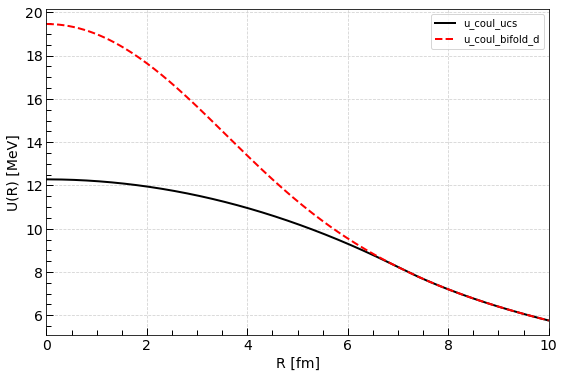


══════════════════════════════════╣./NPA384_1982_65/alpha_58Ni_172_5MeV.py╠══════════════════════════════════

--------------------------------------------------------------------------------
from bifold import *

e_lab = 172.5
z_proj, a_proj =  2,  4
z_targ, a_targ = 28, 58

r = mesh(zero, 11, 0.02)  # fm
q = mesh(zero,  3, 0.02)  # fm^-1

rho_p = f_2prm_gaussian(r, 0.4229, (1/0.7024)**.5)
rho_t = f_ripl(r, z_targ, a_targ)
u_ddm3y = u_ddm3y_reid_zr(e_lab, a_proj, rho_p, rho_t, r, q)
u_m3y = u_m3y_reid_zr(e_lab, a_proj, rho_p, rho_t, r, q)

title = f'alpha + 58Ni@ {e_lab} NPA 384 (1982) 65'

print_all(u_ddm3y, r, q, title=f'DDM3Y - ZR - {title}')
print_all(u_m3y, r, q, title=f'M3Y - ZR - {title}')
#plot_potentials(u, r, part='all', semilogy=True)
plot_potentials([u_m3y, u_ddm3y], r, semilogy=True, ylimit=(0.01, 999), figsize=(6,7.1), title=title)

--------------------------------------------------------------------------------

═════════════════════════════╣DDM3Y - ZR - alpha + 58Ni@ 

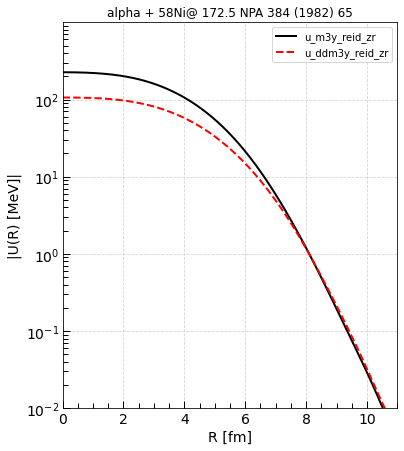


══════════════════════════════╣./PhysLettB342_1995_6/a_40Ca_bdm3y1_141_7MeV.py╠══════════════════════════════

--------------------------------------------------------------------------------
from bifold import *

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.02)  # fm^-1
R = r.copy()
s = r.copy()

e_lab = 141.7
z_proj, a_proj =  2,  4
z_targ, a_targ = 20, 40

rho_p = f_2prm_gaussian(r, 0.4229, (1/0.7024)**.5)
rho_t = f_2prm_fermi(r, 0.169, 3.60, 0.523)

rc = 1.4 * (power(a_proj, 1 / 3) + power(a_targ, 1 / 3))
u_coul = u_coul_ucs(R, rc, z_proj, z_targ)

u_paris = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, R, s, Cs=1/4, dd_name='bdm3y1', vnn_name='paris')

u_reid = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, R, s, Cs=1/4, dd_name='bdm3y1', vnn_name='reid')

# Physics Letters B 342(1995) 6 - 12
# D.T. Khoa, W. von Oertzen.
# Fig 1. in page 8.
u_fig1_total_poly = [0.000949921, 0.00638314, -0.336656, 1.92118,

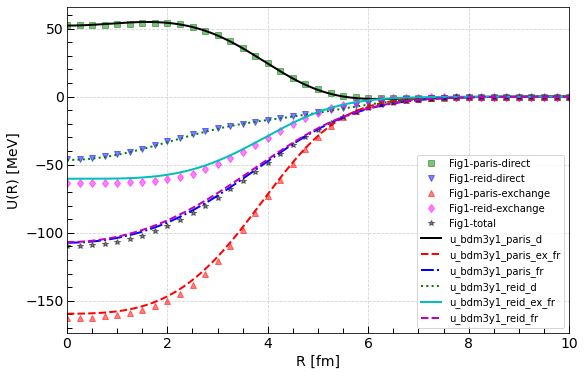


════════════════════════════════╣./PhysRevC49_1994_1652/fig2/o16o16_bdm3y1.py╠════════════════════════════════

--------------------------------------------------------------------------------
from bifold import *

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.02)  # fm^-1
R = r.copy()
s = r.copy()

# Phys. Rev. C 49 (1994) 1652.
u_fig1_bdm3y1_t_poly = [-0.00234749, 0.0614265, -0.581974, 2.52119, -7.61662, 28.3349, -4.34508, -317.04]
u_fig1_bdm3y1_t = f_extrapolate(R, 0.00063, 7.86524, u_fig1_bdm3y1_t_poly)

e_lab = 250.0
z_proj, a_proj =  8, 16
z_targ, a_targ =  8, 16

rho_p = f_2prm_fermi(r, 0.181, 2.525, 0.450)
rho_t = f_2prm_fermi(r, 0.181, 2.525, 0.450)

rc = 1.405 * (power(a_proj, 1 / 3) + power(a_targ, 1 / 3))
rc = 2.71*2
u_coul = u_coul_ucs(R, rc, z_proj, z_targ)

u_bdm3y1 = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, R, s, Cs=1/4, dd_name='bdm3y1', vnn_name='reid')
print_all(u_bdm3y1, r, q)

markevery = int(len(R)*2.5/100)
fig2 = ppl

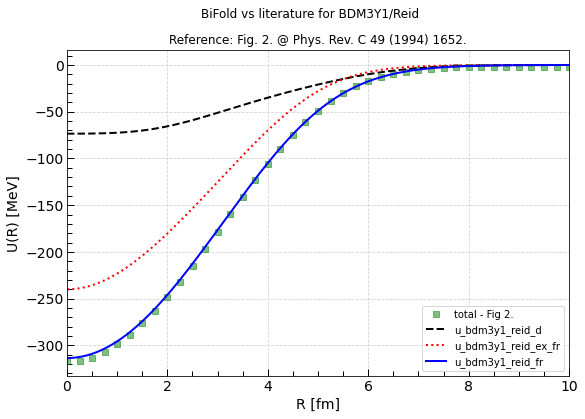


════════════════════════════════╣./PhysRevC49_1994_1652/fig2/o16o16_ddm3y1.py╠════════════════════════════════

--------------------------------------------------------------------------------
from bifold import *

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.02)  # fm^-1
R = r.copy()
s = r.copy()

# Phys. Rev. C 49 (1994) 1652.
u_fig1_ddm3y1_t_poly = [-0.00227828, 0.055726, -0.472432, 1.66004, -4.6781, 24.8367, -2.41258, -326.761]
u_fig1_ddm3y1_t = f_extrapolate(R, 0.02141, 7.86524, u_fig1_ddm3y1_t_poly)

e_lab = 250.0
z_proj, a_proj =  8, 16
z_targ, a_targ =  8, 16

rho_p = f_2prm_fermi(r, 0.181, 2.525, 0.450)
rho_t = f_2prm_fermi(r, 0.181, 2.525, 0.450)

rc = 1.4 * (power(a_proj, 1 / 3) + power(a_targ, 1 / 3))
rc = 2.71*2
u_coul = u_coul_ucs(R, rc, z_proj, z_targ)

u_ddm3y1 = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, R, s, Cs=1/4, dd_name='ddm3y1', vnn_name='reid')
print_all(u_ddm3y1, r, q)

markevery = int(len(R)*2.5/100)
fig2 = pplot(

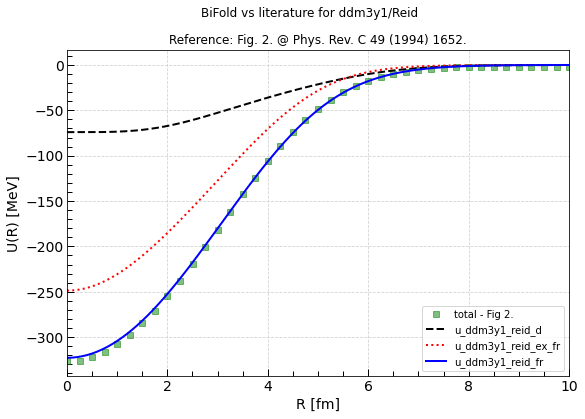


════════════════════════════════╣./PhysRevC49_1994_1652/fig5/o16o16_ddm3y1.py╠════════════════════════════════

--------------------------------------------------------------------------------
from bifold.filon import *

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.02)  # fm^-1
R = r.copy()
s = r.copy()

# Phys. Rev. C 49 (1994) 1652.
u_fig1_ddm3y1_t_poly = {
    160: [-0.00127708, 0.0284608, -0.181577, 0.121312, -0.564074, 20.4557, -1.279950, -340.378],
    480: [-0.00129518, 0.0279258, -0.177686, 0.191960, -0.891316, 18.5787, -1.528820, -290.491],
    960: [-0.00151486, 0.0339716, -0.249294, 0.615374, -1.564210, 14.8922, -1.149480, -225.148],
   1440: [-0.00121332, 0.0267145, -0.186182, 0.347161, -0.446128, 9.73655, -0.436533, -172.022]
}

u_fig1_ddm3y1_t = {
    160: f_extrapolate(R,  0.00580, 7.9696, u_fig1_ddm3y1_t_poly[160]),
    480: f_extrapolate(R, -0.00253, 7.8282, u_fig1_ddm3y1_t_poly[480]),
    960: f_extrapolate(R, -0.00646, 7.8494, u_fig1_ddm3y1_t_poly[960]),
   1

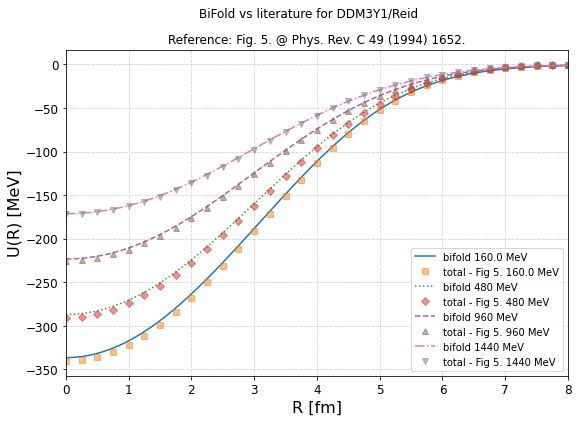


═════════════════════════════╣./PhysRevC56_1997_954/fig5/a_40Ca_bdm3y1_104MeV.py╠═════════════════════════════

--------------------------------------------------------------------------------
#from bifold import *
from bifold.filon import *

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.02)  # fm^-1
R = r.copy()
s = r.copy()

# Phys. Rev. C 56 (1997) 954.
# Dao T. Khoa, G. R. Satchler, and W. von Oertzen
# Fig 5. in page 961.

# Physics Letters B 342(1995) 6 - 12
# D.T. Khoa, W. von Oertzen.
# Fig 3. in page 8.
u_fig5_bdm3y1_t_poly = [-0.000136496, 0.00570176, -0.0862306, 0.387249, -0.476532, 4.03722, -0.200097, -117.938]
u_fig5_bdm3y1_t = f_extrapolate(R, 0.01254, 5.04892, u_fig5_bdm3y1_t_poly)
plot_fig5 = pplot(R, u_fig5_bdm3y1_t, label='total - Fig 5.',linestyle = 'None', marker='s',
                  markevery=int(len(R)*2.5/100), color='green', alpha=0.5)

e_lab = 104.0
z_proj, a_proj =  2,  4
z_targ, a_targ = 20, 40
Cs = '1/4'

rho_p = f_2prm_gaussian(r, 0.4229, (1/0.7024

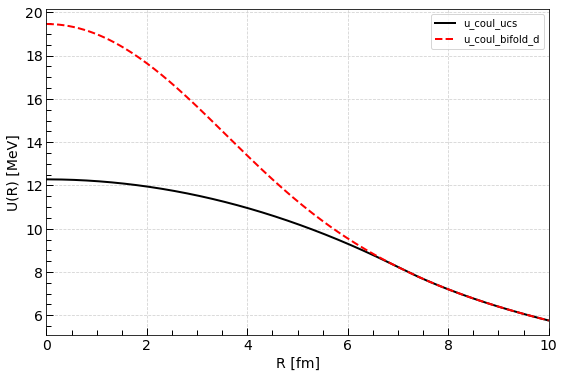


══════════════════════════════╣exchange part using analytical Coulomb potential╠══════════════════════════════

density/interaction               L          norm        renorm      vol2        vol4            msr
──────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────total     - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_bdm3y1_paris_fr      0          None        1.000   -39862.763  -736836.945       18.484 
───────direct    - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_bdm3y1_paris_d       0          None        1.000    13490.242    90737.500        6.726     c = 1.252    alpha = 0.000     beta = 0.000    gamma = 1.745        n = 1.000       gE = 0.922    
───────part1     - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_direct            

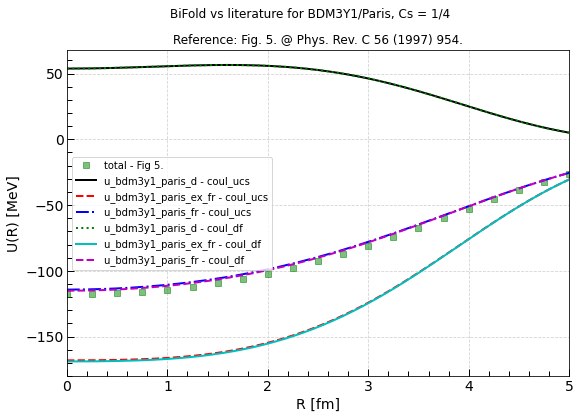


═════════════════════════════╣./PhysRevC56_1997_954/fig5/a_40Ca_cdm3y6_104MeV.py╠═════════════════════════════

--------------------------------------------------------------------------------
from bifold import *

r_min, r_max, dr = 5e-2, 15, 5/100 #fm
q_min, q_max, dq = 5e-2,  3, 5/100 #fm^-1

#r_min, r_max, dr = 4/100, 15, 4/100 #fm
#q_min, q_max, dq = 4/100,  3, 4/100 #fm^-1


r = mesh(r_min, r_max, dr)  # fm
q = mesh(q_min, q_max, dq)  # fm^-1
R = r.copy()
s = r.copy()

# Phys. Rev. C 56 (1997) 954.
# Dao T. Khoa, G. R. Satchler, and W. von Oertzen
u_fig5_cdm3y6_t_poly = [0.00259902, -0.0374923, 0.174945, -0.38456, 0.673565, 3.4871, 0.0990434, -122.409]
u_fig5_cdm3y4_t_poly = [0.00325549, -0.048278, 0.258383, -0.772158, 1.67862, 2.46336, 0.839039, -127.58]
u_fig5_cdm3y2_t_poly = [0.0115437, -0.168472, 0.724117, -1.06224, 5.24953, -0.221292, -131.727]
u_fig5_ddm3y1_t_poly = [0.00922679, -0.14986, 0.706704, -1.26995, 6.15651, -0.737525, -136.596]

u_fig5_cdm3y6_t = f_extrapolate(R,

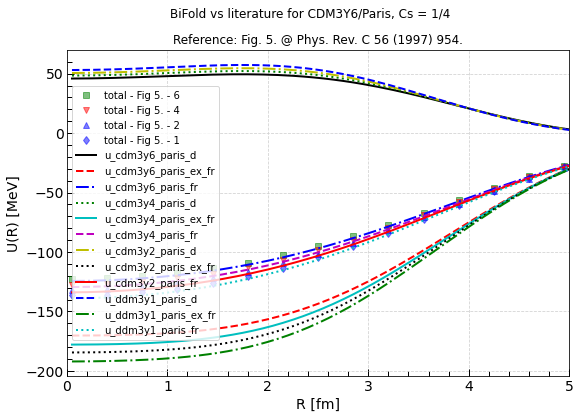


══════════════════════════════╣./PhysRevC63_2001_034007/a_12C_cdm3y6_120MeV.py╠══════════════════════════════

--------------------------------------------------------------------------------
from bifold import *

r_min, r_max, dr = zero, 15, 5/100 #fm
q_min, q_max, dq = zero,  3, 5/100 #fm^-1

r = mesh(r_min, r_max, dr)  # fm
q = mesh(q_min, q_max, dq)  # fm^-1
R = r.copy()
s = r.copy()

# Phys. Rev. C 63 (2001) 034007.
u_fig2_cdm3y6_t_poly = [0.000756501,-0.0289373,0.416498,-2.74808,7.49829,-3.00499,5.82575,-86.2282]
u_fig2_cdm3y6_t = f_extrapolate(R, 0.1295, 7.9639, u_fig2_cdm3y6_t_poly)

e_lab = 120.0
z_proj, a_proj =  2,  4
z_targ, a_targ =  6, 12
Cs = '1/4'

rho_p = f_2prm_gaussian(r, 4/(sqrt_pi*1.2658)**3, 1.2658)
rho_t = f_2prm_fermi(r, 0.19354, 2.214, 0.425)

rc = 1.405 * (power(a_proj, 1 / 3) + power(a_targ, 1 / 3))
u_coul = u_coul_ucs(R, rc, z_proj, z_targ)

u_cdm3y6 = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, R, s, Cs=eval(Cs), dd_nam

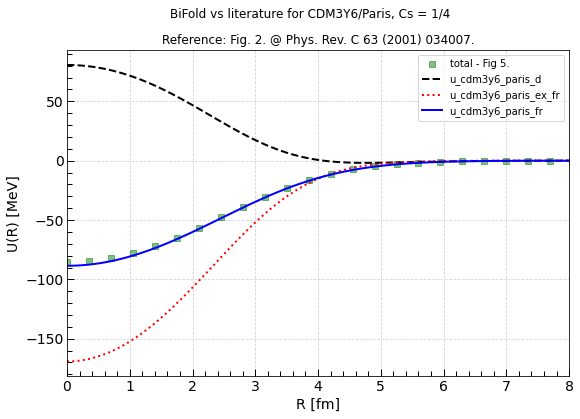


══════════════════════════════════╣./PhysRevLett74_1995_34/o16o16_bdm3y1.py╠══════════════════════════════════

--------------------------------------------------------------------------------
from bifold import *

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero, 3, 0.05)  # fm^-1
R = r.copy()  # fm
s = r.copy()

# Phys. Rev. Lett. 74 (1995) 34.
# Dao T. Khoa, W. von Oertzen, H. G. Bohlen, G. Bartnitzky, H. Clement, Y. Sugiyama,
# B. Gebauer, A. N. Ostrowski, Th. Wilpert, M. Wilpert, and C. Langner
u_fig1_bdm3y1_d_poly = [0.0034318, -0.089972, 0.915882, -4.90944, 17.7298, -44.6933, 5.53461, 223.865]
u_fig1_bdm3y1_e_poly = [-0.00332156, 0.0859079, -0.831079, 4.19002, -17.706, 65.3812, -6.13047, -553.627]
u_fig1_bdm3y1_t_poly = [-0.00280904, 0.0734505, -0.704694, 3.15484, -9.48535, 31.7323, -4.97658, -330.222]

u_fig1_bdm3y1_d = f_extrapolate(R, 0.0253, 7.9544, u_fig1_bdm3y1_d_poly)
u_fig1_bdm3y1_e = f_extrapolate(R, 0.0122, 7.9904, u_fig1_bdm3y1_e_poly)
u_fig1_bdm3y1_t = f_extrapolate(R, 

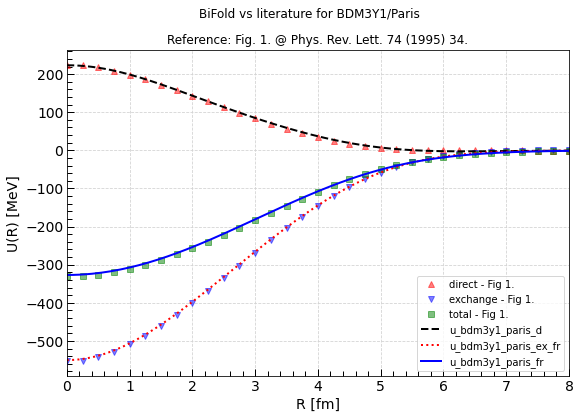


══════════════════════════════════╣./PhysRevLett74_1995_34/o16o16_bdm3yn.py╠══════════════════════════════════

--------------------------------------------------------------------------------
from bifold.simpson import *

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.05)  # fm^-1


R = r.copy()  # fm
s = r.copy()

# Phys. Rev. Lett. 74 (1995) 34.
# Dao T. Khoa, W. von Oertzen, H. G. Bohlen, G. Bartnitzky, H. Clement, Y. Sugiyama,
# B. Gebauer, A. N. Ostrowski, Th. Wilpert, M. Wilpert, and C. Langner
u_fig1_bdm3y1_d_poly = [0.0034318, -0.089972, 0.915882, -4.90944, 17.7298, -44.6933, 5.53461, 223.865]
u_fig1_bdm3y1_e_poly = [-0.00332156, 0.0859079, -0.831079, 4.19002, -17.706, 65.3812, -6.13047, -553.627]
u_fig1_bdm3y1_t_poly = [-0.00280904, 0.0734505, -0.704694, 3.15484, -9.48535, 31.7323, -4.97658, -330.222]
u_fig1_bdm3y1_d = f_extrapolate(R, 0.0253, 7.9544, u_fig1_bdm3y1_d_poly)
u_fig1_bdm3y1_e = f_extrapolate(R, 0.0122, 7.9904, u_fig1_bdm3y1_e_poly)
u_fig1_bdm3y1_t = f_extra

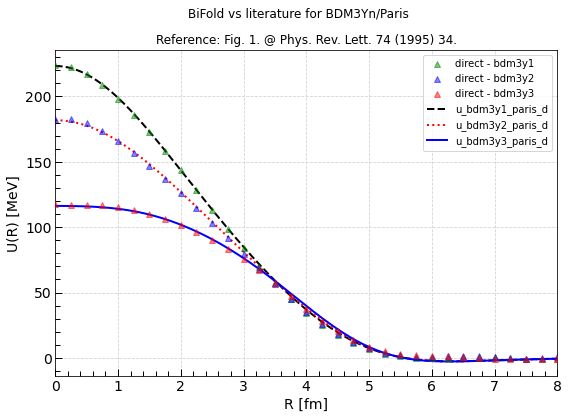

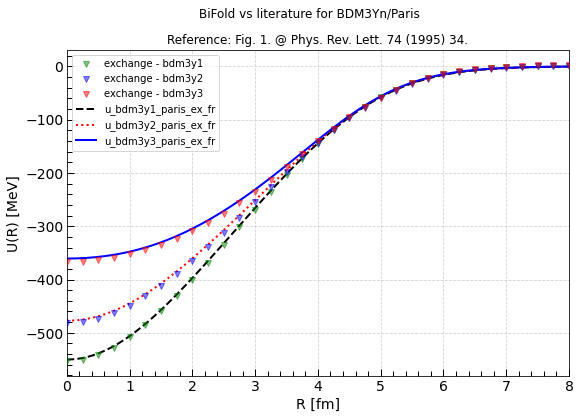

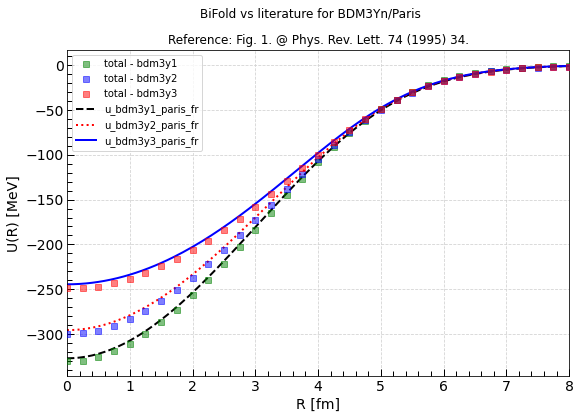

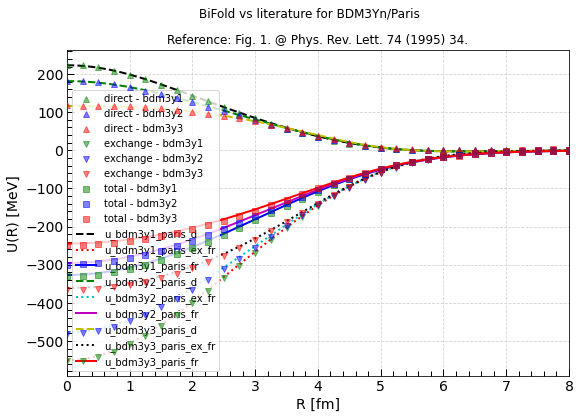


══════════════════════════════════╣./PhysRevLett74_1995_34/o16o16_ddm3y1.py╠══════════════════════════════════

--------------------------------------------------------------------------------
from bifold import *

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero, 3, 0.05)  # fm^-1
R = r.copy()  # fm
s = r.copy()

# Phys. Rev. Lett. 74 (1995) 34.
# Dao T. Khoa, W. von Oertzen, H. G. Bohlen, G. Bartnitzky, H. Clement, Y. Sugiyama,
# B. Gebauer, A. N. Ostrowski, Th. Wilpert, M. Wilpert, and C. Langner
u_fig1_ddm3y1_d_poly = [0.0117149, -0.651094, 8.79112, -38.6738, 0.0429354, 246.366]
u_fig1_ddm3y1_e_poly = [-0.0104167, 0.257082, -1.74218, -2.33534, 49.812, 5.49646, -593.414]
u_fig1_ddm3y1_t_poly = [-0.0106482, 0.287112, -2.61602, 7.33225, 10.0029, 6.37578, -347.154]

u_fig1_ddm3y1_d = f_extrapolate(R, 0.0232, 6.8141, u_fig1_ddm3y1_d_poly)
u_fig1_ddm3y1_e = f_extrapolate(R, 0.0285, 7.7748, u_fig1_ddm3y1_e_poly)
u_fig1_ddm3y1_t = f_extrapolate(R, 0.0372, 7.8975, u_fig1_ddm3y1_t_poly)

e_lab 

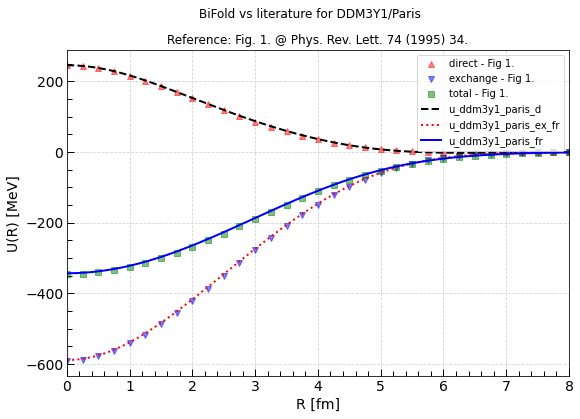


════════════════════════════════════╣./templates/python_files/3he_4he.py╠════════════════════════════════════

--------------------------------------------------------------------------------
from bifold import *

e_lab = 100.0
z_proj, a_proj =  2, 3
z_targ, a_targ =  2, 4

r = mesh(zero, 15, 0.02)  # fm
q = mesh(zero, 15, 0.02)  # fm^-1

rho_p = f_2prm_gaussian(r, 0.2201, (1/0.5505)**.5)
rho_t = f_2prm_gaussian(r, 0.4229, (1/0.7024)**.5)

u_ddm3y = u_ddm3y_reid_zr(e_lab, a_proj, rho_p, rho_t, r, q)
u_m3y = u_m3y_reid_zr(e_lab, a_proj, rho_p, rho_t, r, q)

title = f'3He + 4He @ {e_lab} MeV'
plot_potentials([u_m3y, u_ddm3y], r,  title=title)

plot_potentials([u_m3y, u_ddm3y], r,  title=title, semilogy=True)

print_all(u_ddm3y, r, q, title=f'DDM3Y - ZR - {title}')
print_all(u_m3y, r, q, title=f'M3Y - ZR - {title}')
--------------------------------------------------------------------------------


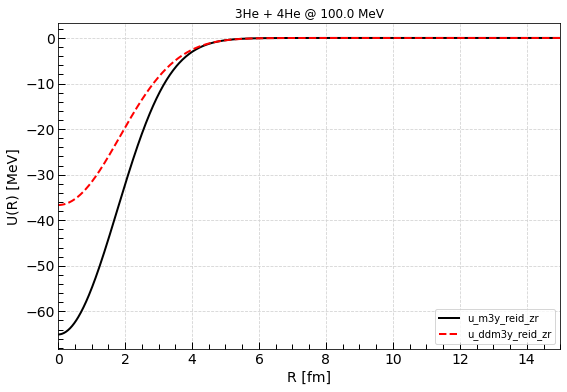

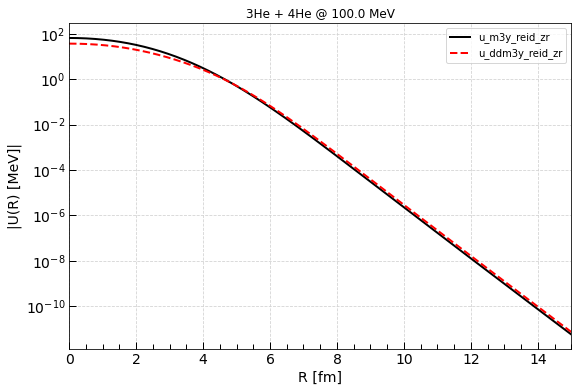


═════════════════════════════════════╣DDM3Y - ZR - 3He + 4He @ 100.0 MeV╠═════════════════════════════════════

density/interaction               L          norm        renorm      vol2        vol4            msr
──────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────total     - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_ddm3y_reid_zr        0          None        1.000    -3070.932   -26716.113        8.700 
───────direct    - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_ddm3y_reid_d         0          None        1.000    -1191.770   -15661.690       13.142     c = 0.298    alpha = 4.845     beta = 7.432    
───────part1     - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_direct               0          None        1.000    -1750.856   -212

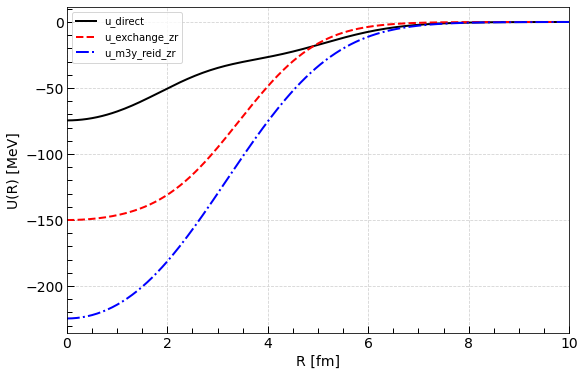


═══════════════════════════════╣./templates/python_files/input_bifold_bdm3y.py╠═══════════════════════════════

--------------------------------------------------------------------------------
from bifold import *

e_lab = 141.7
z_proj, a_proj =  2,  4
z_targ, a_targ = 20, 40

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.05)  # fm^-1
R = r.copy()
s = r.copy()

rho_p = f_2prm_gaussian(r, 0.4229, (1/0.7024)**.5)
rho_t = f_2prm_fermi(r, 0.169, 3.60, 0.523)

rc = 1.2 * (power(a_proj, 1 / 3) + power(a_targ, 1 / 3))
u_coul = u_coul_ucs(R, rc, z_proj, z_targ)

u_paris = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, R, s, Cs=1/4, dd_name='bdm3y1', vnn_name='paris')

u_reid = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, R, s, Cs=1/4, dd_name='bdm3y1', vnn_name='reid')

print_all(u_paris, r, q, R, s)
print_all(u_reid, r, q, R, s)

plot_potentials(u_reid, R, part='all', block=False)
plot_potentials(u_paris, R, part='al

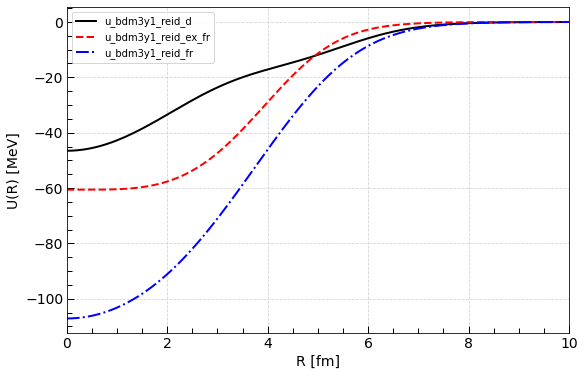

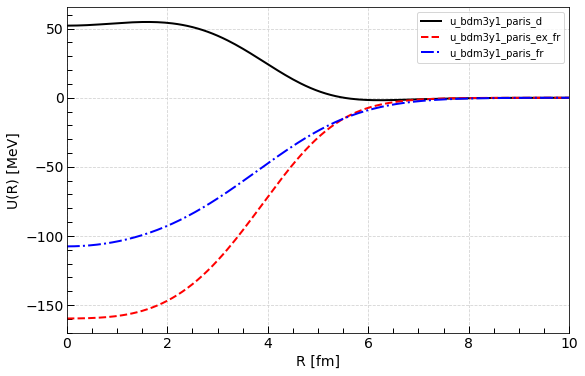

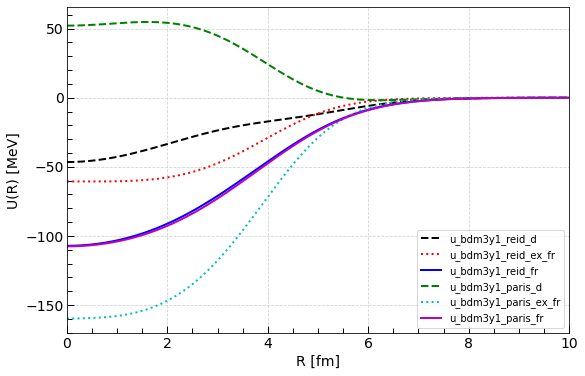

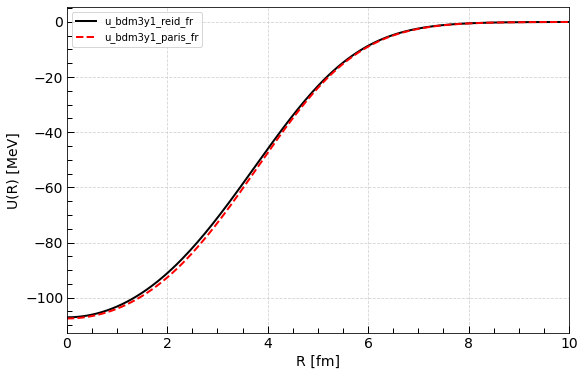


═══════════════════════════════╣./templates/python_files/input_bifold_ddm3y.py╠═══════════════════════════════

--------------------------------------------------------------------------------
from bifold import *

e_lab = 141.7
z_proj, a_proj =  2,  4
z_targ, a_targ = 20, 40

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.05)  # fm^-1

rho_p = f_2prm_gaussian(r, 0.4229, (1/0.7024)**.5)
rho_t = f_2prm_fermi(r, 0.169, 3.60, 0.523)
#rho_t = f_ripl(r, z_targ, a_targ)
u = u_ddm3y_reid_zr(e_lab, a_proj, rho_p, rho_t, r, q)

print_all(u, r, q)
plot_potentials(u, r, part='all')

--------------------------------------------------------------------------------
density/interaction               L          norm        renorm      vol2        vol4            msr
──────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────total     - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      :

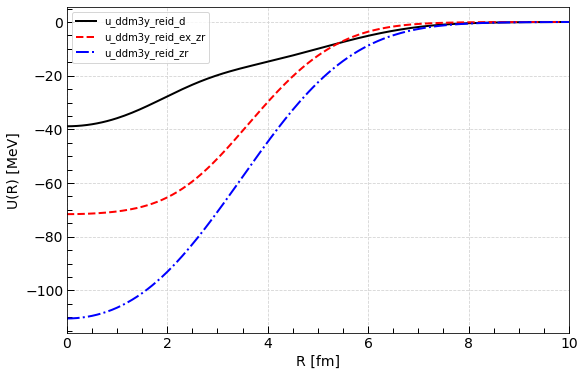


═════════════════════════════╣./templates/python_files/input_bifold_plot_all.py╠═════════════════════════════

--------------------------------------------------------------------------------
from bifold import *
#print_bifold_logo()

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.05)  # fm^-1
R = r.copy()  # fm
s = r.copy()

e_lab = 141.7
z_proj, a_proj =  2,  4
z_targ, a_targ = 20, 40

rho_p = f_2prm_gaussian(r, 0.4229, (1/0.7024)**.5)
#rho_t = f_2prm_fermi(r, 0.169, 3.60, 0.523)
rho_t = f_ripl(r, z_targ, a_targ)

u1 =  u_m3y_reid_zr(e_lab, a_proj, rho_p, rho_t, r, q, R, s)
u2 =  u_m3y_paris_zr(e_lab, a_proj, rho_p, rho_t, r, q, R, s)

print_all(u1, r, q)
print_all(u2, r, q, show='info')
plot_potentials([u1, u2], R, part='all', linestyles=['dashed', 'dotted', 'solid', 'dashed', 'dotted', 'solid'])
plot_fouriers([u1, u2], q, part='all', linestyles=['dashed', 'dotted', 'solid', 'dashed', 'dotted', 'solid'])
plot_all(u1, r, q)

-----------------------------------------------------

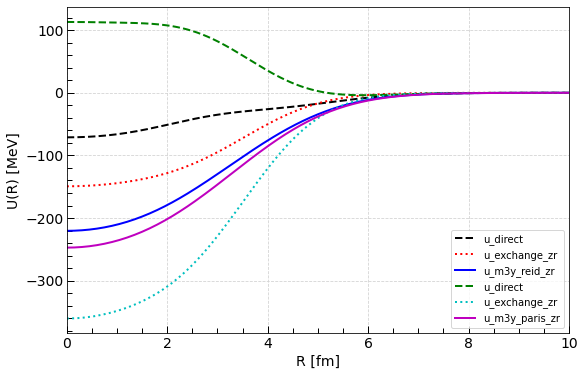

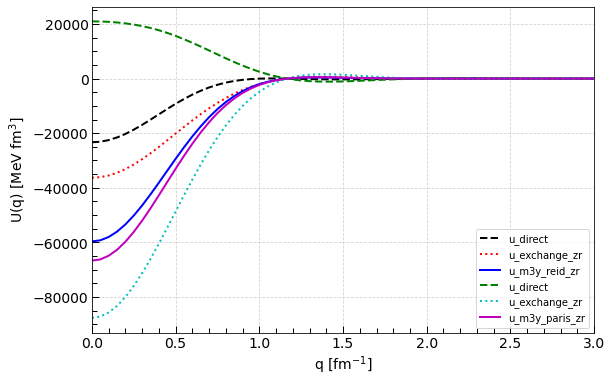

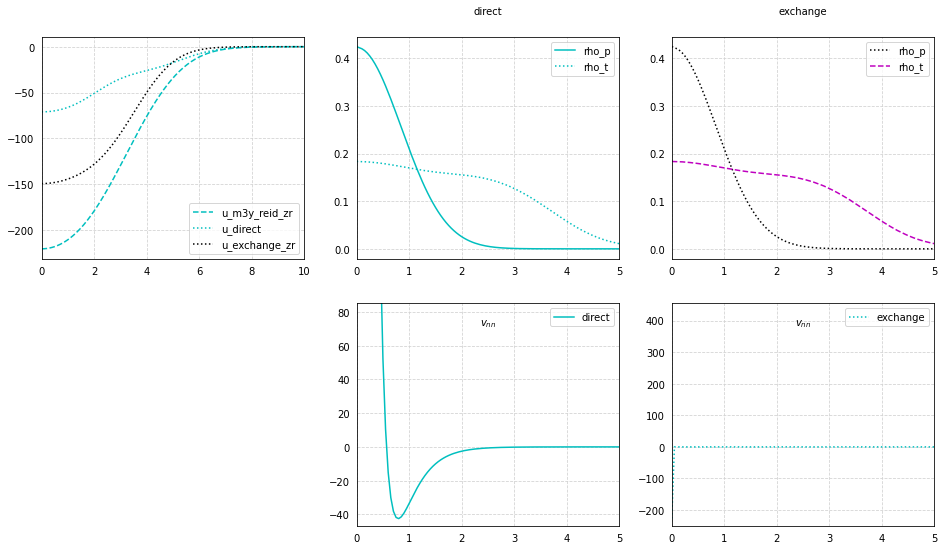

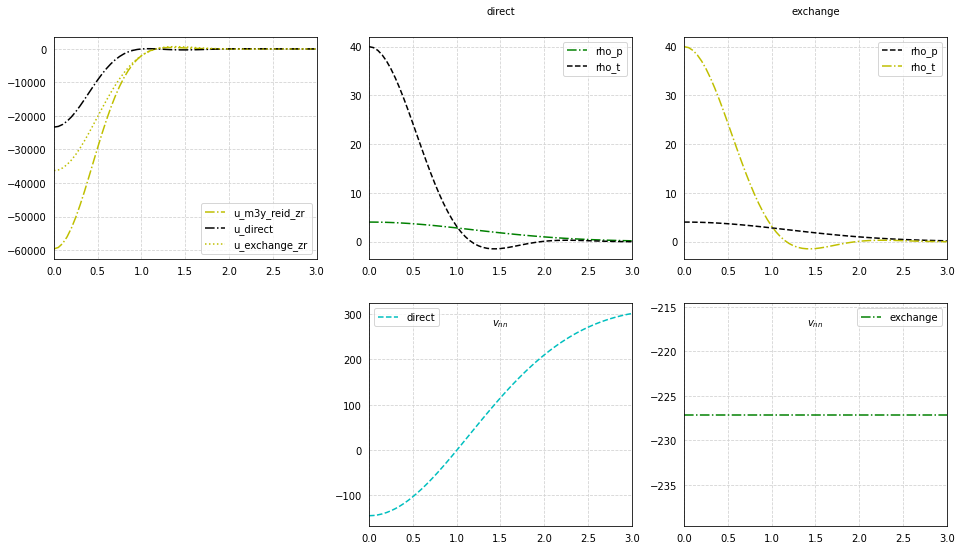


═════════════════════════════╣./templates/python_files/input_bifold_ZR_vs_FR.py╠═════════════════════════════

--------------------------------------------------------------------------------
from bifold import *

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.05)  # fm^-1

e_lab = 141.7
z_proj, a_proj =  2,  4
z_targ, a_targ = 20, 40

rho_p = f_2prm_gaussian(r, 0.4229, (1/0.7024)**.5)
rho_t = f_2prm_fermi(r, 0.169, 3.60, 0.523)

u1    = u_m3y_reid_zr(e_lab, a_proj, rho_p, rho_t, r, q)
u2_zr = u_xdm3yn_zr(e_lab, a_proj, rho_p, rho_t, r, q, dd_name='dim3y', vnn_name='reid')

rc = 1.4 * (power(a_proj, 1 / 3) + power(a_targ, 1 / 3))
u_coul = u_coul_ucs(r, rc, z_proj, z_targ)
u2_fr1 = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, Cs=1/4, dd_name='dim3y', vnn_name='reid')
u2_fr2 = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, dd_name='dim3y', vnn_name='reid')


print_all(u1, r, q)
print_all(u2_zr, r, q)
print_all(u2

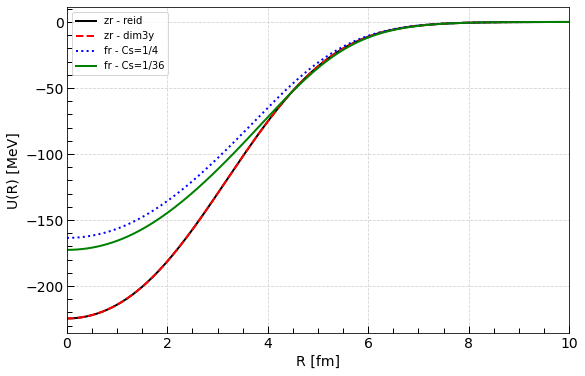

In [2]:
import os
from bifold import print_title

working_dir = os.getcwd()
for dirpath, dnames, fnames in os.walk("."):
    for fname in fnames:
        if fname.endswith(".py") and 'run_test' not in fname:
            test_file = os.path.join(dirpath, fname)
            print_title(title=test_file)
            os.chdir(dirpath)
            #os.system(f'python {fname}')
            #%run -i $fname
            
            print('-'*80)
            with open(fname, 'r') as file_text:
                print(file_text.read())
            print('-'*80)
            
            exec(open(fname).read())

            os.chdir(working_dir)